In [1]:
import sys, shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sys.path.append('/t3home/gcelotto/ggHbb/NN')
from plotsForNN import getShap

from NN_multiclass import getFeatures
from tensorflow.keras.models import Sequential, load_model

/work/gcelotto/miniconda3/envs/myenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-07-09 14:46:11.730776: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-09 14:46:11.736490: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-09 14:46:11.756068: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 14:46:11.786962: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 14:46:11.

In [2]:
Xtest = pd.read_parquet("/t3home/gcelotto/ggHbb/NN/input/multiclass/inclusive/XTest_medium.parquet")
featuresForTraining = getFeatures()[0]
model = load_model("/t3home/gcelotto/ggHbb/NN/output/multiClass/inclusive/_medium/model/model_medium.h5")
pTmin, pTmax, suffix = [[0,-1,'inclusive'], [0, 30, 'lowPt'], [30, 100, 'mediumPt'], [100, -1, 'highPt']][0]
inFolder, outFolder = "/t3home/gcelotto/ggHbb/NN/input/multiclass/inclusive", "/t3home/gcelotto/ggHbb/NN/output/multiClass/inclusive/_XXrisk/"

In [5]:
plt.figure()
Xtest = Xtest.sample(frac=1)
Xshap = Xtest.iloc[:1000,:][featuresForTraining]
print(Xshap.shape)
explainer = shap.GradientExplainer(model=model, data=Xshap)

shap_values = explainer.shap_values(np.array(Xshap))

#print(shap_values)
shap_values_average = abs(shap_values).mean(axis=0)
shap_values_average_sum = shap_values_average.sum(axis=1)
#print(shap_values_average)
indices = np.argsort(shap_values_average_sum)

(1000, 25)


<Figure size 1000x1000 with 0 Axes>

(25,)
(25,)


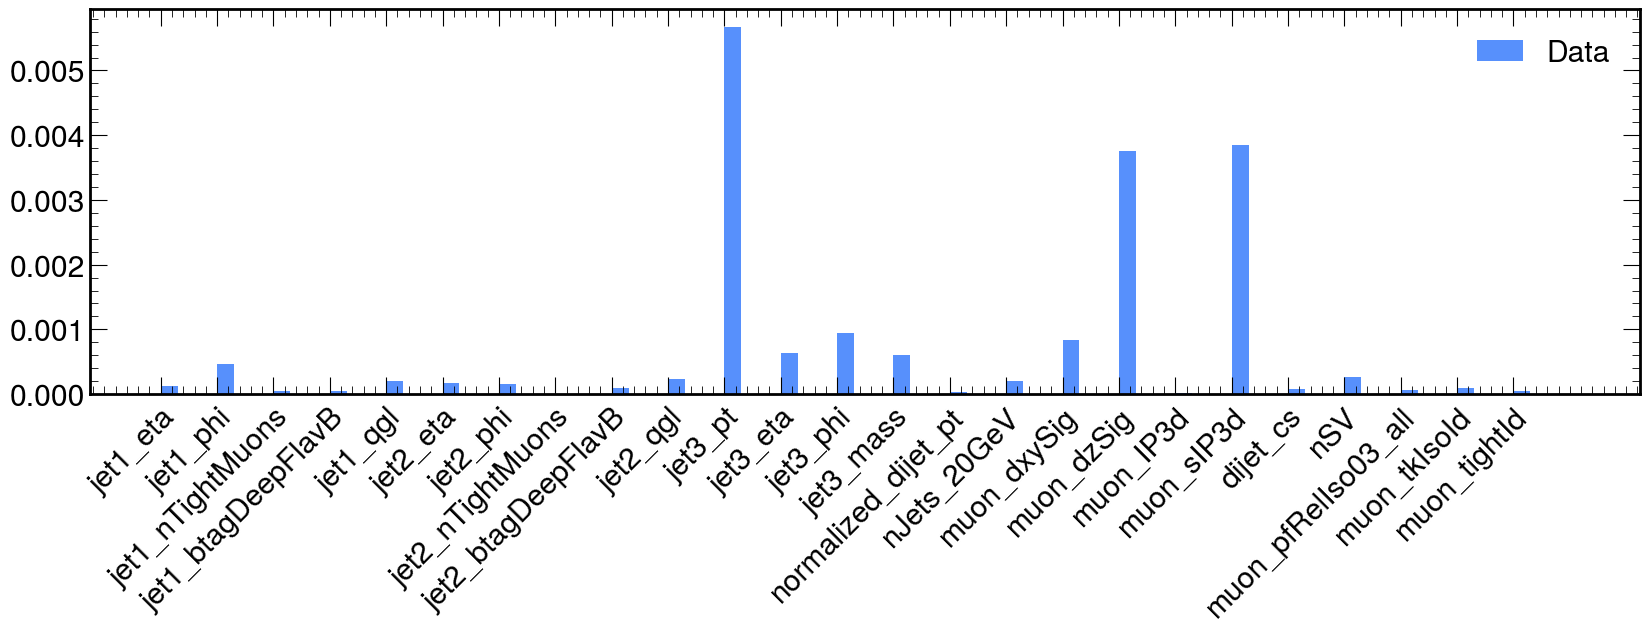

In [6]:
fig, ax =plt.subplots(1, 1, figsize=(20, 5))
bins = np.arange(len(featuresForTraining)+1)
print(bins[:-1].shape)
print(shap_values_average[:,0].shape)
#print(shap_values_average[:,1])
c0=ax.hist(bins[:-1],bins=bins, width=0.3,color='C0', weights=shap_values_average[:,0] ,label='Data')[0]
#c1=ax.hist(bins[:-1],bins=bins, width=0.3,color='C1', weights=shap_values_average[:,1] ,label='Higgs', bottom=c0)[0]
#c2=ax.hist(bins[:-1],bins=bins, width=0.3,color='C2', weights=shap_values_average[:,2] , label='Z',bottom=c0+c1)[0]
ax.set_xticks(np.arange(len(featuresForTraining)), labels=featuresForTraining)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.legend()